# Decision Trees

Trees are also a data structure. The idea of trees that we learned in Graph Theory are very similar to the ideas in computer science; trees are made of nodes and edges and are acyclic.\
In the case of a tree, there is always a starting point. We call this the **root node**. The other nodes are called **leaf nodes**. Decision trees are algorithms used in machine learning. A decision tree learns at every level which feature to split.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()

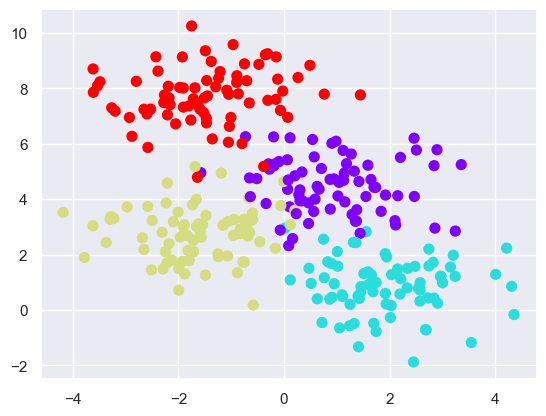

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [3]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier().fit(X, y)

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'): 
    ax = plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()))
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    # We create a mesh grid just like in SVM.
    # The *xlim unravels the data structure (for example, unraveling a tuple (1,2,3) into 3 separate values 1, 2, 3).
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    # This gets our contours.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Gives the number of classes in the dataset.
    n_classes = len(np.unique(y))
    # This is a more complicated contour plot than SVM.
    # We need n+1 levels since the background is also counted as a contour.
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1), cmap=cmap)
    ax.set(xlim=xlim, ylim=ylim)

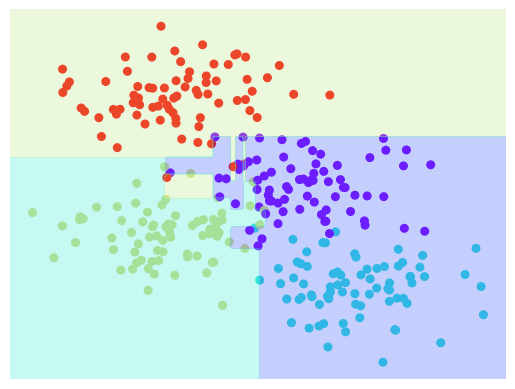

In [7]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Overfitting Decision Trees

Decision trees can be overfit when there are too many splits. If you split a lot, they may not generalize well when looking at the test dataset. How do we avoid this?\
We could sample the dataset instead of looking at the entire dataset, then make splits.\
We could also take an intersection of two graphs with splits and see those results. This is the basis of Random Forests Classifier.